# Estadísticos y calculos

## Importar librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

## Cargar base de datos

![petalo-sepalo](img/petalo-sepalo.jpg)

In [2]:
df = pd.read_csv('../data/iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.drop(axis=1, columns='Id', inplace=True)

nuevos_nombres = {
    'SepalLengthCm' : 'sepal_length_cm', 
    'SepalWidthCm' : 'sepal_width_cm', 
    'PetalLengthCm' : 'petal_length_cm', 
    'PetalWidthCm': 'petal_width_cm',
    'Species' : 'species'
}

df = df.rename(columns=nuevos_nombres)

df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


(array([ 1.,  3.,  1.,  4.,  2.,  5.,  6., 10.,  9.,  4.,  1.,  6.,  7.,
         6.,  8.,  7.,  3.,  6.,  6., 13.,  0.,  7.,  5.,  2., 11.,  0.,
         4.,  2.,  0.,  4.,  0.,  1.,  1.,  4.,  0.,  1.]),
 array([4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5,
        5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
        6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9]),
 <BarContainer object of 36 artists>)

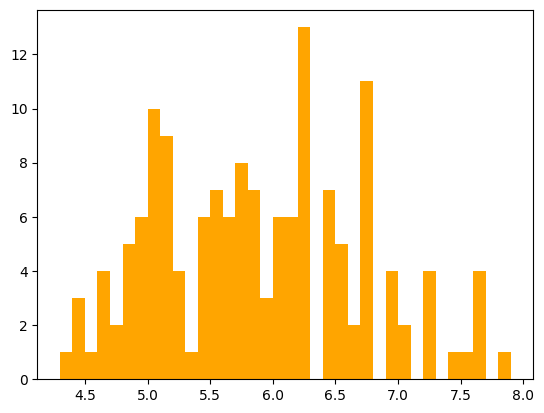

In [4]:
plt.hist(df['sepal_length_cm'], color='orange', bins=int(180/5))

<Axes: xlabel='sepal_length_cm', ylabel='Count'>

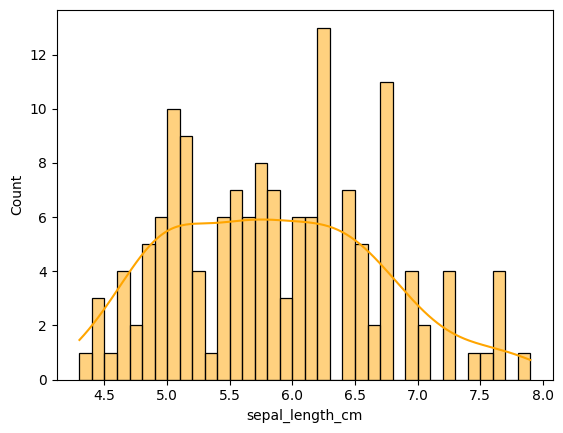

In [5]:
sns.histplot(df['sepal_length_cm'], kde=True, color='orange', bins=int(180/5))

## Población

### Calculo de la varianza

$$\sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2

In [6]:
df['sepal_length_cm'].var(ddof=0)

0.6811222222222223

### Calculo de la desviación estandar

$$\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}\


In [7]:
df['sepal_length_cm'].std(ddof=0)

0.8253012917851409

### Calculo del promedio

$$\mu = \frac{1}{N} \sum_{i=1}^{N} x_i\

In [8]:
df['sepal_length_cm'].mean()

5.843333333333334

## Muestra (muestreo aleatorio simple)

In [9]:
df_muestra = df.sample(frac=0.5)
df_muestra.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
75,6.6,3.0,4.4,1.4,Iris-versicolor
3,4.6,3.1,1.5,0.2,Iris-setosa
79,5.7,2.6,3.5,1.0,Iris-versicolor
80,5.5,2.4,3.8,1.1,Iris-versicolor
86,6.7,3.1,4.7,1.5,Iris-versicolor


### Calculo de la varianza

$$s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2


In [10]:
df_muestra['sepal_length_cm'].var()

0.740900900900901

### Calculo de la desviacion estandar

$$s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2}


In [11]:
df_muestra['sepal_length_cm'].std()

0.8607560054399278

### Calculo del promedio

$$\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i


In [12]:
df_muestra['sepal_length_cm'].mean()

5.993333333333333

## Calculo de intervalo de confianza

### Creando la distribución

In [13]:
np.random.seed(20)
dias = np.random.randint(0,10,10) #dias de vacaciones
dinero = dias+np.random.normal(0,1,10) # (%) de dinero gastado

In [14]:
print(dias)
print(dinero)

[3 9 4 6 7 2 0 6 8 5]
[1.91516741 9.55969629 4.93946935 5.02151896 7.50309684 2.40641447
 0.32346101 5.50658912 7.20798321 4.15763207]


### Visualización de resultados con un intervalo de confianza del 80%

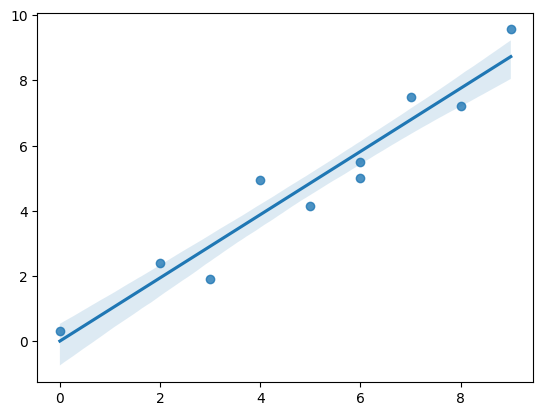

In [15]:
grafico = sns.regplot(x=dias,y=dinero, ci=80)

In [16]:
tuple = list(zip(dias,dinero))
tuple

[(3, 1.9151674126826672),
 (9, 9.559696289403918),
 (4, 4.939469349856077),
 (6, 5.021518957881304),
 (7, 7.503096840109191),
 (2, 2.406414468894801),
 (0, 0.3234610099156434),
 (6, 5.50658911809112),
 (8, 7.207983209222818),
 (5, 4.157632065861516)]

In [17]:
df = pd.DataFrame(
    tuple,
    columns=['dias_vacaciones', 'dinero_gastado']
)
df

,dias_vacaciones,dinero_gastado
0,3,1.915167
1,9,9.559696
2,4,4.939469
3,6,5.021519
4,7,7.503097
5,2,2.406414
6,0,0.323461
7,6,5.506589
8,8,7.207983
9,5,4.157632


In [18]:
# Intervalo de confianza a un 68%
st.t.interval(confidence=0.68, df=len(df)-1, loc=np.mean(df), scale=st.sem(df))

(array([3.99882002, 3.99351844]), array([5.85528285, 5.86058443]))

In [19]:
# Intervalo de confianza a un 95%
st.t.interval(confidence=0.95, df=len(df)-1, loc=np.mean(df), scale=st.sem(df))

(array([2.93201634, 2.92062172]), array([6.92208653, 6.93348116]))

In [20]:
# Intervalo de confianza a un 99%
st.t.interval(confidence=0.99, df=len(df)-1, loc=np.mean(df), scale=st.sem(df))

(array([2.06096589, 2.04459626]), array([7.79313698, 7.80950661]))